## Original Data of 2022 of parking Tickets Data Analysis (EDA)

In [334]:
### Import the Relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
import statsmodels as st
import tensorflow as tf
from raiutils.exceptions import UserConfigValidationException
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

In [335]:
## Read the data and Combine 

df0 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.000.csv')
df1 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.001.csv')
df2 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.002.csv')
df3 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.003.csv')
df4 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.004.csv')
df5 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.005.csv')
df6 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.006.csv')
df7 = pd.read_csv(r'C:\Users\Reet\Downloads\deep_learning\Interview\Parking_Tags_Data_2022.007.csv')

df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7], axis=0).sort_values(by=['date_of_infraction']).reset_index(drop=True)

df.head(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***73863,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,3.0,OPP,233 COLERIDGE AVE,NaN,NaN,ON
1,***04234,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,801.0,NR,868 MANNING AVE,NaN,NaN,ON
2,***48080,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,800.0,NR,28 LINDEN ST,NaN,NaN,ON
3,***70907,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,759.0,NR,92 SUMACH ST,NaN,NaN,ON
4,***58671,20220101,8,STAND VEH.-PROHIBIT TIME/DAY,100,759.0,NR,5 CLARENCE SQ,NaN,NaN,ON


## DataFrame Info

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821887 entries, 0 to 1821886
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   tag_number_masked       object        
 1   date_of_infraction      datetime64[ns]
 2   infraction_code         int64         
 3   infraction_description  int64         
 4   set_fine_amount         int64         
 5   time_of_infraction      float64       
 6   location1               object        
 7   location2               object        
 8   location3               object        
 9   location4               object        
 10  province                object        
 11  country                 object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 166.8+ MB


In [ ]:
## Main Column for fine statistics

In [382]:
fine_stat = df['set_fine_amount'].describe()
fine_stat

count    1.821887e+06
mean     5.288339e+01
std      5.011657e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.000000e+01
75%      5.000000e+01
max      5.000000e+02
Name: set_fine_amount, dtype: float64

In [386]:
## BAsic Statistics for the fine

(array([1.168203e+06, 3.522320e+05, 1.959920e+05, 7.901400e+04,
        3.500000e+01, 1.150400e+04, 1.630000e+02, 0.000000e+00,
        0.000000e+00, 1.474400e+04]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

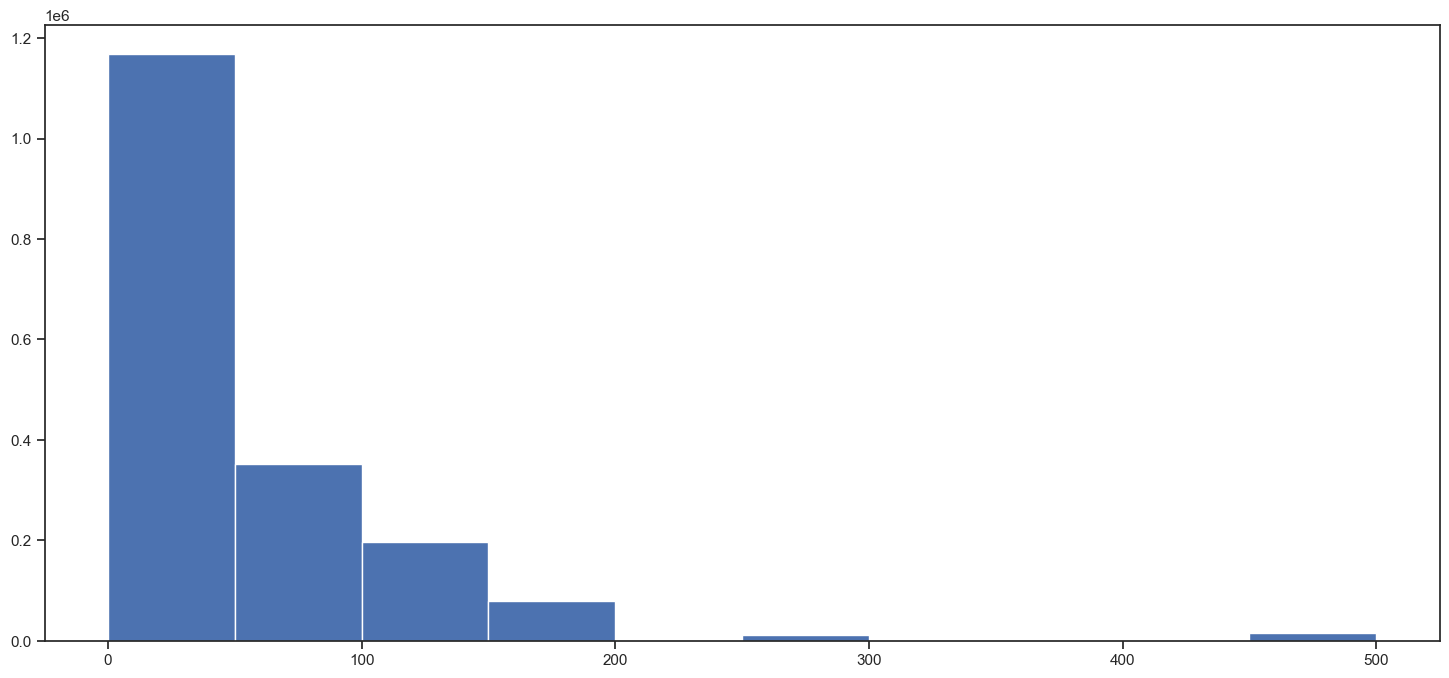

In [383]:
plt.hist(df['set_fine_amount'])

In [ ]:
#Boxplot of distribution of the fine.

<Axes: >

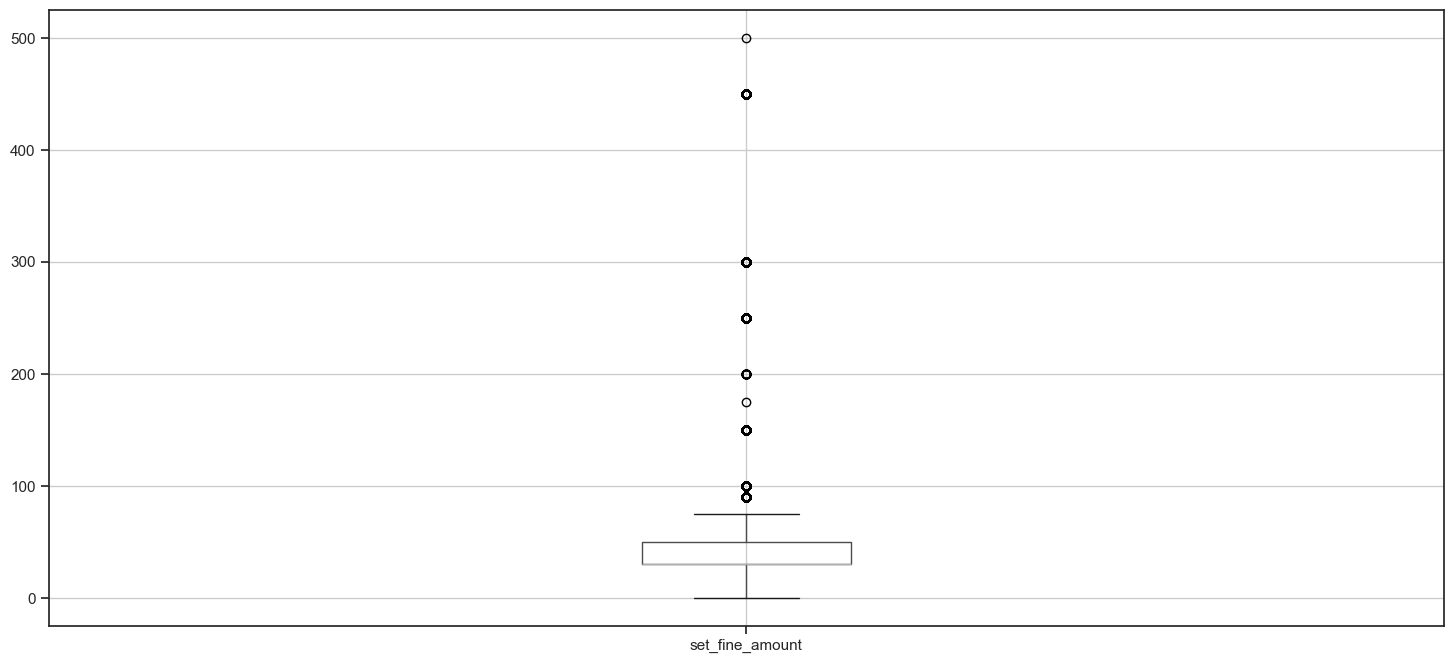

In [385]:
df.boxplot(column =['set_fine_amount'], grid = True) 

## Let's see the different Types of Fine and their occurrences

[Text(0, 0, '114'),
 Text(0, 0, '23'),
 Text(0, 0, '1.07236e+06'),
 Text(0, 0, '94920'),
 Text(0, 0, '276489'),
 Text(0, 0, '55'),
 Text(0, 0, '11540'),
 Text(0, 0, '63520'),
 Text(0, 0, '508'),
 Text(0, 0, '195970'),
 Text(0, 0, '79004'),
 Text(0, 0, '1'),
 Text(0, 0, '35'),
 Text(0, 0, '11484'),
 Text(0, 0, '163'),
 Text(0, 0, '14741'),
 Text(0, 0, '1')]

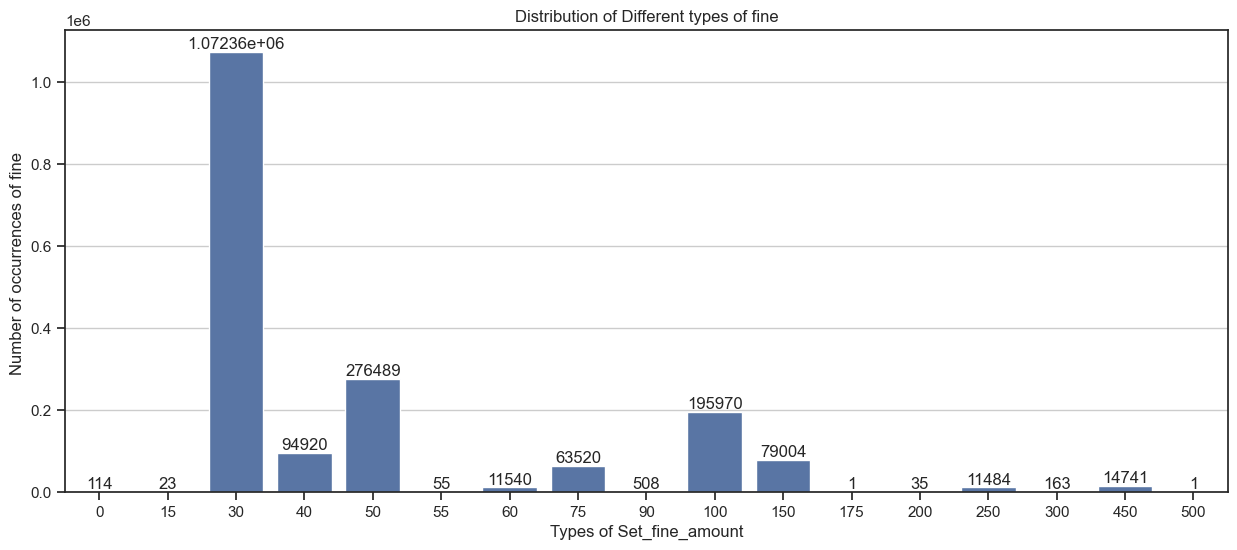

In [336]:
## BAsic EDA of Fine amount 
%matplotlib inline

### Fine_amount_Distribution

plt.figure(figsize = (15,6))
sns.set(style="ticks")
plt.xlabel('Types of Set_fine_amount') 
plt.ylabel('Number of occurrences of fine ')
plt.title('Distribution of Different types of fine') 
plt.grid(True)
fine_amount_distribution = df.groupby(['set_fine_amount'], sort = False).count()
ax = sns.barplot(x = fine_amount_distribution.index,y = 'time_of_infraction',data = fine_amount_distribution)
ax.bar_label(ax.containers[0]) 



## Now let's see which provinces have most fine occurrences.

[Text(0, 0, '114'),
 Text(0, 0, '23'),
 Text(0, 0, '1.07236e+06'),
 Text(0, 0, '94920'),
 Text(0, 0, '276489'),
 Text(0, 0, '55'),
 Text(0, 0, '11540'),
 Text(0, 0, '63520'),
 Text(0, 0, '508'),
 Text(0, 0, '195970'),
 Text(0, 0, '79004'),
 Text(0, 0, '1'),
 Text(0, 0, '35'),
 Text(0, 0, '11484'),
 Text(0, 0, '163'),
 Text(0, 0, '14741'),
 Text(0, 0, '1')]

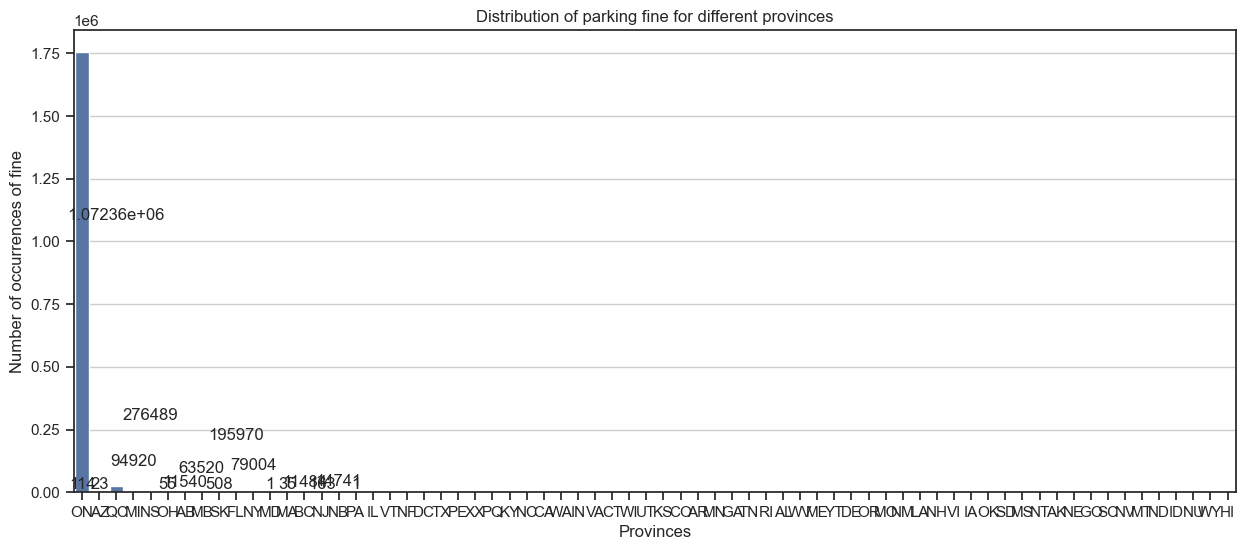

In [338]:
#### EDA of Province

province = df.groupby(['province'], sort = False).count()
province['province'] = province.index

len(province)

k = []
for i in range(0,68):
    k.append(i)

k = pd.DataFrame(k)
k['province'] = province.index
k = k.set_index('province')

result = pd.merge(province,k, how="inner", on=province.index) 

plt.figure(figsize = (15,6))
sns.set(style="ticks")
plt.xlabel('Provinces') 
plt.ylabel('Number of occurrences of fine')
plt.title('Distribution of parking fine for different provinces') 
plt.grid(True)
#province_fine_distribution = df.groupby(['set_fine_amount'], sort = False).count()
ax2 = sns.barplot(x = "key_0",y = 'set_fine_amount',data = result)
ax2.bar_label(ax.containers[0]) 



In [339]:
### Reason of Parking EDA

df['infraction_description'].unique()


array(['PARK PROHIBITED TIME NO PERMIT', 'STAND VEH.-PROHIBIT TIME/DAY',
       'PARK-SIGNED HWY-PUBLIC LANE', 'PARK ON PRIVATE PROPERTY',
       'PARK-WITHIN 3M OF FIRE HYDRANT', 'PARK-SIGNED HWY-PROHIBIT DY/TM',
       'PARK IN A FIRE ROUTE', 'STOP-SIGNED HWY-PROHIBIT TM/DY',
       'PARK - BETWEEN ROAD & SIDEWALK', 'STOP-(ON/OVER) (SIDEWK/FTPATH)',
       'PARK-N.YORK 2AM-6AM DEC1-MAR31', 'STAND UNAUTH VEH. CAR SHARE',
       'PARK COMMERC LOAD ZONE NOT LDG', 'PARK HEAVY (TRUCK/VEH.) TM/DY',
       'FAIL TO PARK/STOP PARALL. RGHT', 'PARK MACHINE-REQD FEE NOT PAID',
       'PARK-SIGNED HWY-TURNING BASIN', 'PARK ON MUNICIPAL PROPERTY',
       'PARK IN ACCESSIBLE NO PERMIT', 'STAND SIGNED TRANSIT STOP',
       'STND ONSTRT ACCESSIBLE NO PRMT', 'PARK - ON BOULEVARD',
       'PARK PRO VEH ON BICYCLE PATH', 'STOP VEH OTR THN BCYCL-BYCL LN',
       'STOP-ROAD SIDE-STOP/PARK VEH.', 'PARK-WITHIN 9M INTERSECT ROAD',
       'STOP NON-BICYCLE IN CYCLE TRCK', 'PARK-OBSTRUCT (DRWAY/LANEWAY)',
   

In [340]:
df2 = df

### I have tried to change all the different values based on the starting word. Starting word "park" means the parking ticket was handed due to the car park in a wrong manner. "Stop" means the car wrong in front of the stop sign. "Standby" means the car was ready to move but was still standing."Failed parking" means the car parked in improper manner ( not straight )

In [341]:
m=df2['infraction_description'].str.startswith('PARK')
df2['infraction_description'] =np.where(m,'PARK Wrongly',df2['infraction_description'])

m=df2['infraction_description'].str.startswith('STOP')
df2['infraction_description'] =np.where(m,'Complete STOP Wrongly',df2['infraction_description'])

m=df2['infraction_description'].str.startswith('STAND')
df2['infraction_description'] =np.where(m,'STANDBY',df2['infraction_description'])

m=df2['infraction_description'].str.startswith('FAIL')
df2['infraction_description'] =np.where(m,'FAILED PARKING',df2['infraction_description'])

df2['infraction_description'].unique()

array(['PARK Wrongly', 'STANDBY', 'Complete STOP Wrongly',
       'FAILED PARKING', 'STND ONSTRT ACCESSIBLE NO PRMT',
       'STND ONSTRT ACCESSIBLE NOT D/O', 'STND ACCESSIBLE LOAD NO PERMIT',
       'STND ACCESSIBLE LOAD NOT DRP/O', 'PRK/STP LEFT WHLS CLSE TO LEFT',
       'PARALLEL PARK-METERED SPACE-FR', 'Park Prohibited Area No Permit',
       'PARALLEL PARK-METERED SPACE-RE', 'STND BUS-SIGNED HWY-PROH DY/TM',
       'PRK CAR-SHR VEH. IN WAITL AREA', 'PARAL PRK-MTRD-FR WHLS NO OPP',
       'PAR PARK - F TIRES NOT OPP MTR'], dtype=object)

## Now wanted to see the distribution of each parking reason

[Text(0, 0, '1.5602e+06'),
 Text(0, 0, '84109'),
 Text(0, 0, '162733'),
 Text(0, 0, '6677'),
 Text(0, 0, '6206'),
 Text(0, 0, '427'),
 Text(0, 0, '419'),
 Text(0, 0, '107'),
 Text(0, 0, '18'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '19'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

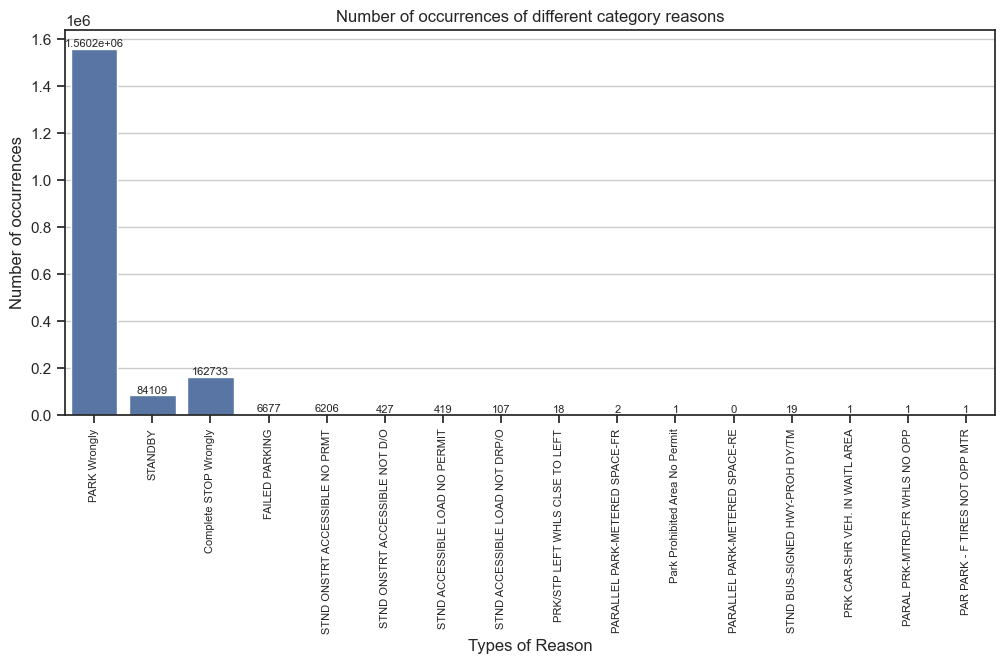

In [342]:
### Different Types of fines occurrence based on the description



Different_types_reason = df2.groupby(['infraction_description',], sort = False).count()
Different_types_reason = Different_types_reason.drop(['infraction_code'], axis=1)
#print(Different_types_reason)

plt.figure(figsize = (12,5))
sns.set(style="ticks")
plt.grid(True)
plt.xticks(rotation = 90,fontsize=8)
plt.xlabel('Types of Reason') 
plt.ylabel('Number of occurrences')
plt.title('Number of occurrences of different category reasons') 
ax = sns.barplot(x=Different_types_reason.index, y='time_of_infraction', data=Different_types_reason) 

ax.bar_label(ax.containers[0],fontsize=8)

## Now tried to see a complete group to get a hard evidence on the fact that really ontario has the highest count of parking

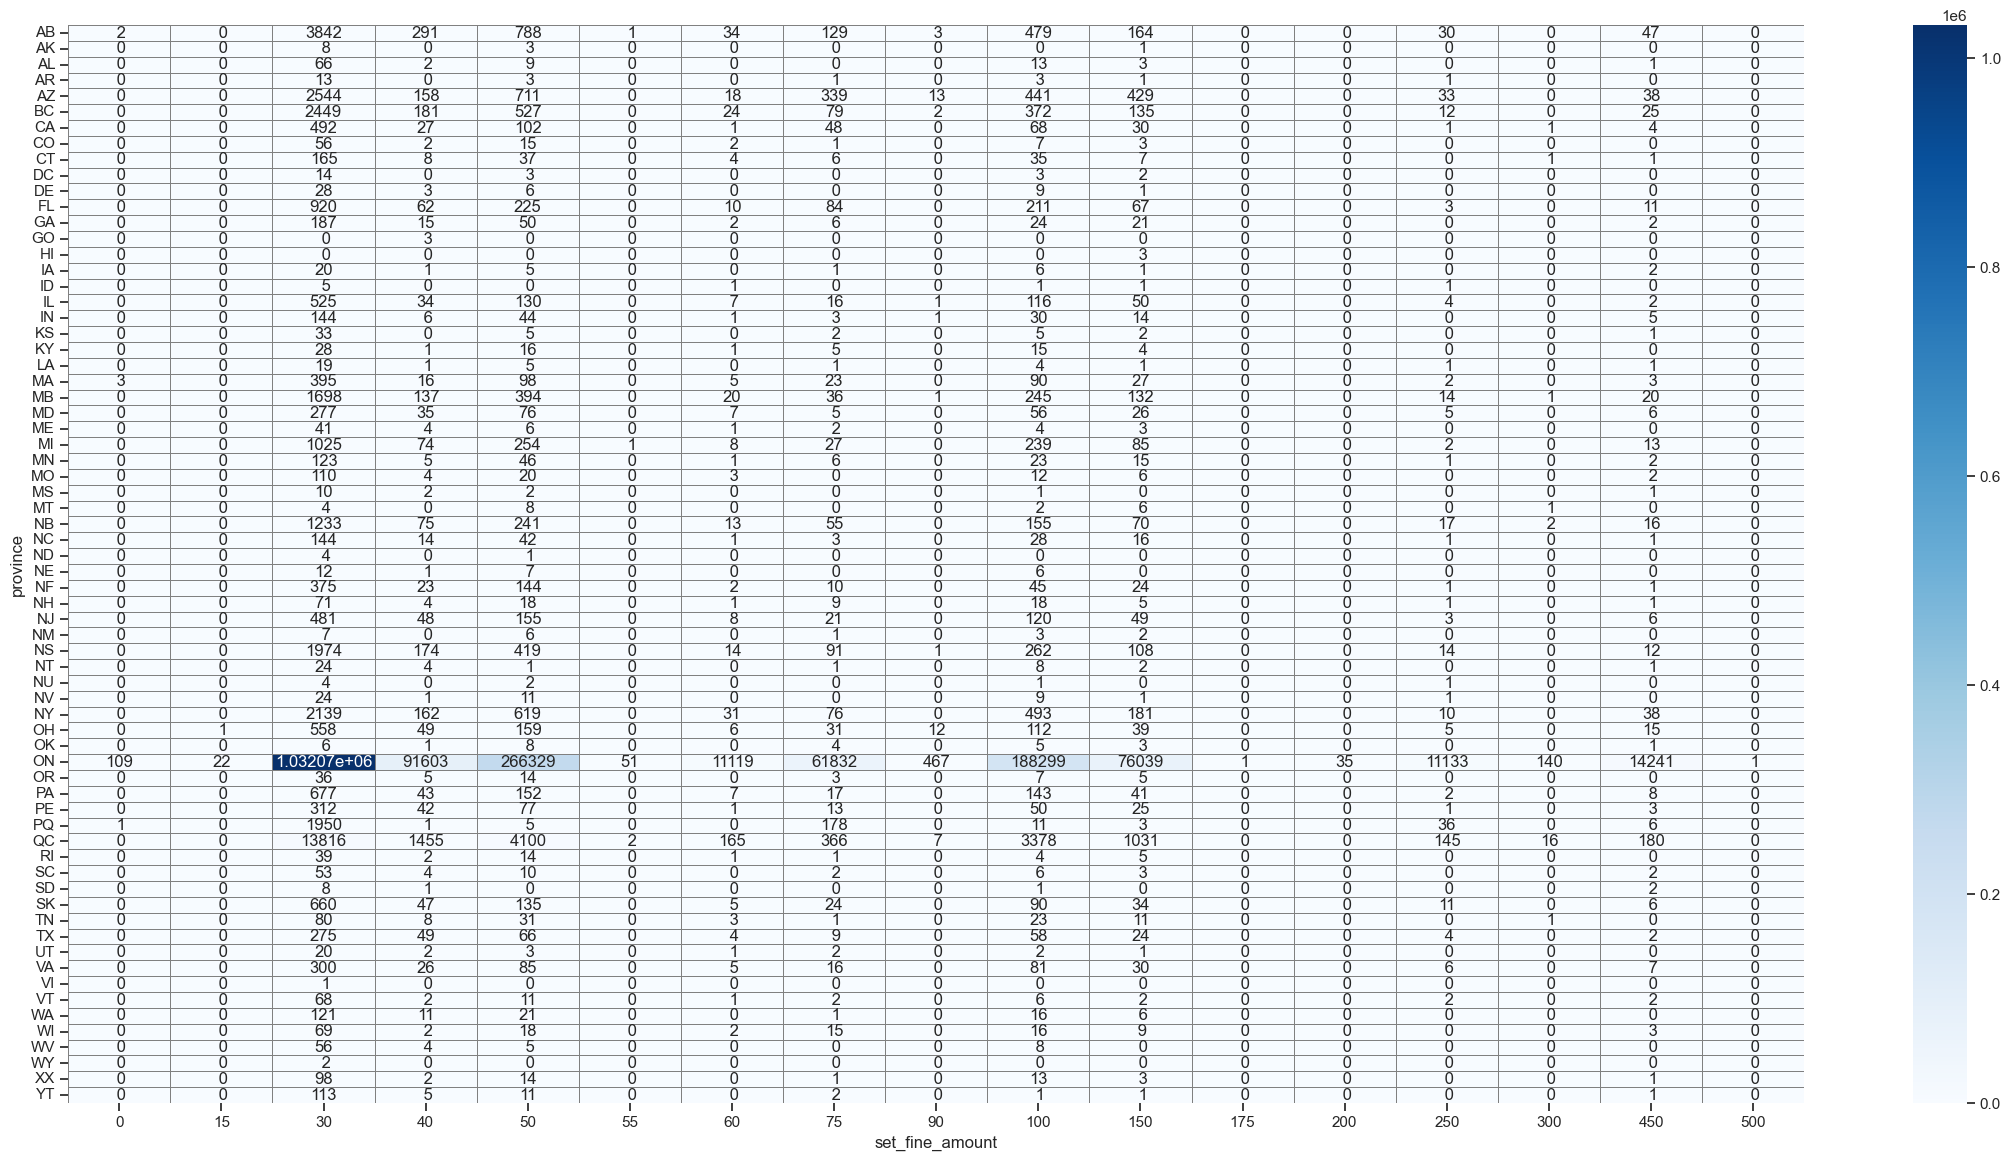

In [343]:
### Which type of parking happened most mapping for Ontario heatmap

grouped_1 = pd.DataFrame(df2.groupby(['set_fine_amount','province'])['set_fine_amount'].count())
grouped_1.head(7)

grouped1 = grouped_1.unstack(level=0)['set_fine_amount']
grouped1 = grouped1.fillna(0)
grouped1.head()

plt.figure(figsize = (28,14))
sns.set(style="ticks")
plt.xticks(rotation = 0)
plt.grid()
new = grouped1.T
ax = sns.heatmap(grouped1,cmap="Blues", linewidth = 0.5,linecolor='grey',annot=True,fmt='2g') 

## Really there are some cars are from US too.Lets see the distribution of two countries ( US & Canada )

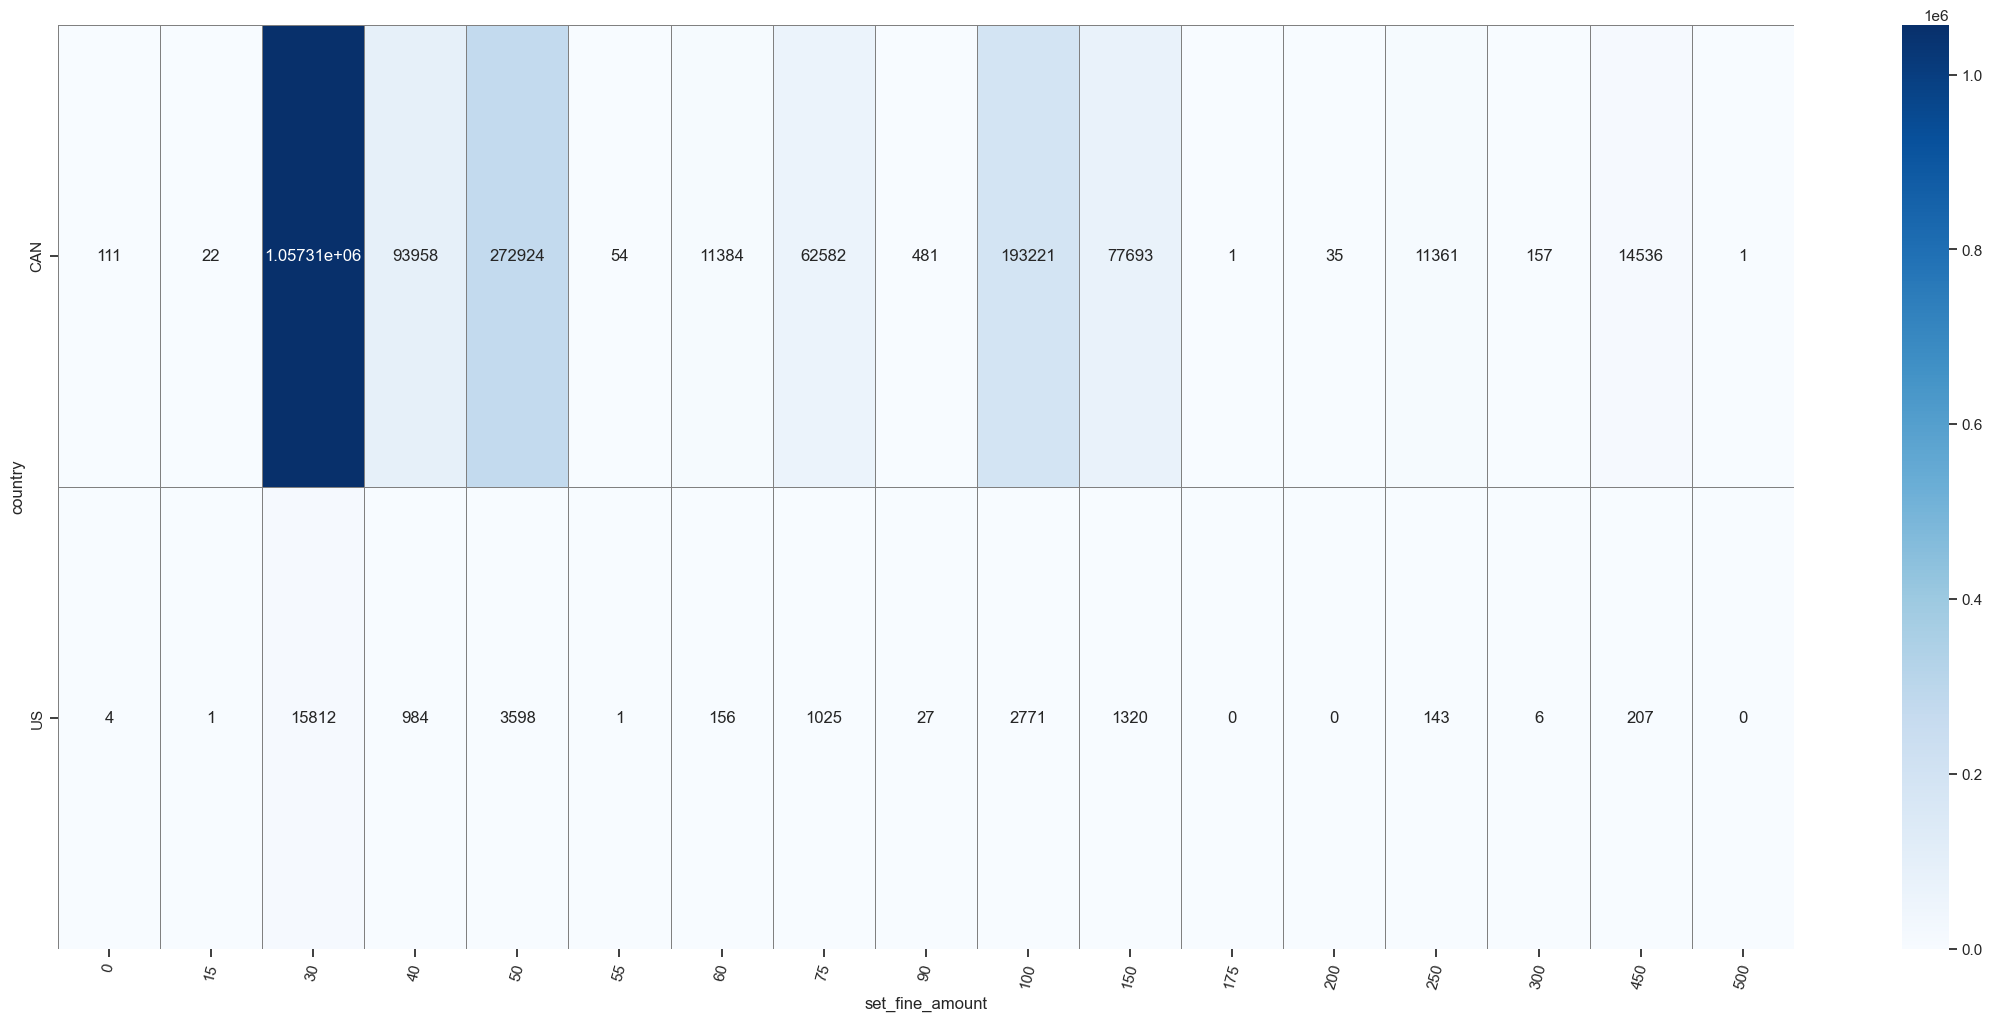

In [344]:
### Skewed Data proof1###
## mostly short fines are happened in Canada which is 30CAD.
df2['country']=df2['province'].apply(lambda x: 'US' if x not in ['ON','AB','SK','BC','QC','NF','NS','PE','MB','YT'] else 'CAN')
grouped2 = pd.DataFrame(df2.groupby(['set_fine_amount','country'])['set_fine_amount'].count())
grouped2 = grouped2.unstack(level=0)['set_fine_amount']
grouped2 = grouped2.fillna(0)
grouped2.head()

plt.figure(figsize = (28,12))
sns.set(style="ticks")
plt.xticks(rotation = 75)
plt.grid()
#new = grouped1.T
ax = sns.heatmap(grouped2,cmap="Blues", linewidth = 0.5,linecolor='grey',annot=True,fmt='g') 

# Conclusion: most fines happened in CANADA Ontario which is for 30 CAD due to park wrongly.

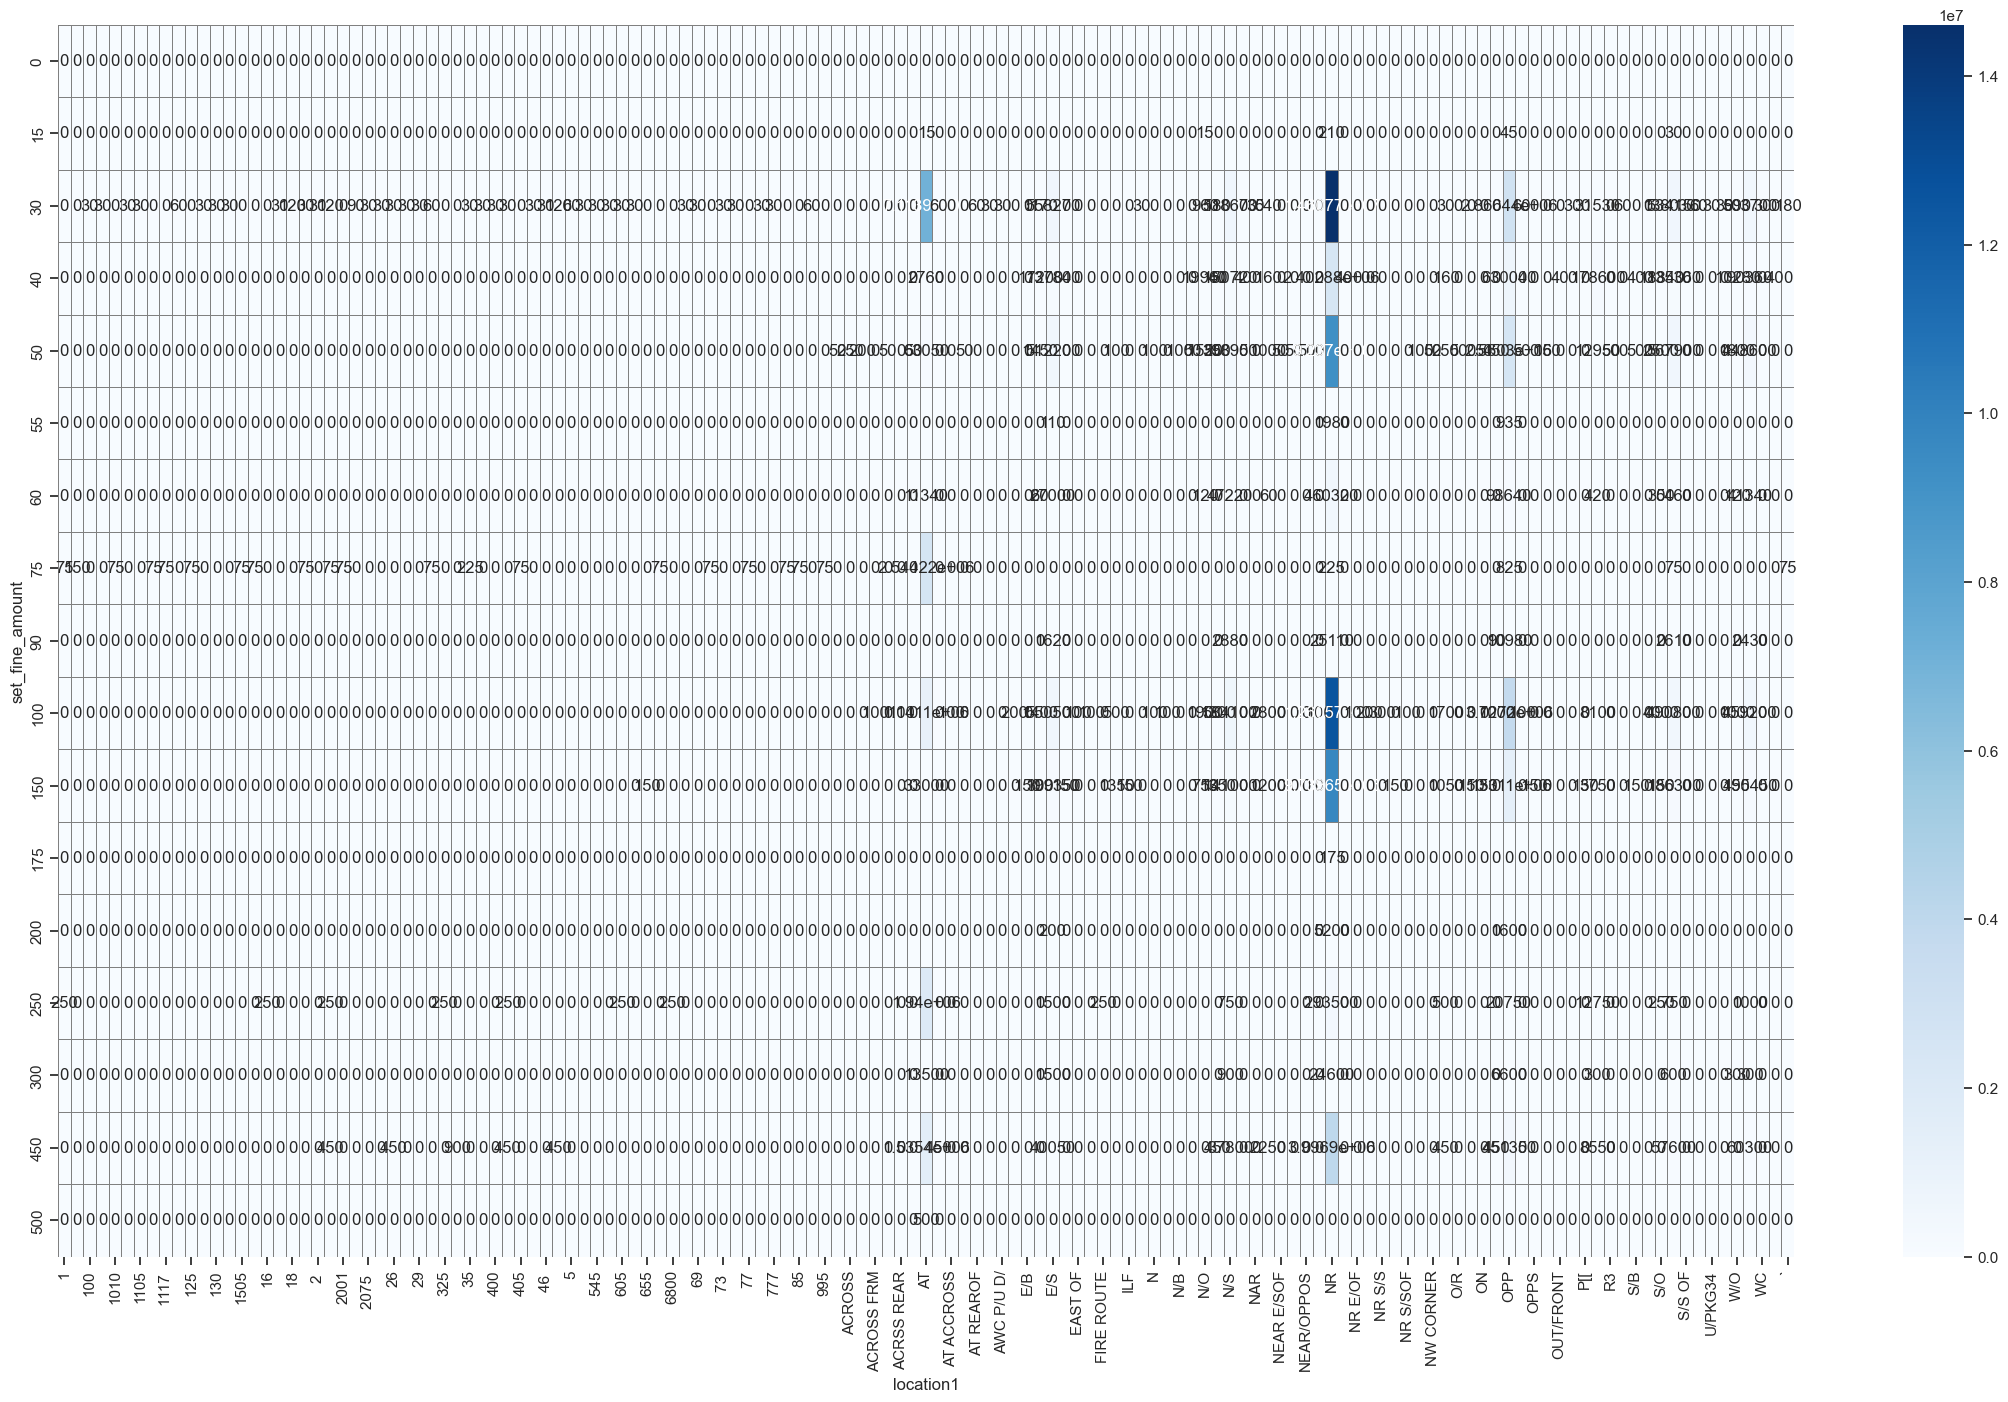

In [345]:
# which location Tag is affected

Location_group = pd.DataFrame(df2.groupby(['set_fine_amount','location1'])['set_fine_amount'].sum())
Location_group = Location_group.unstack(level=0)['set_fine_amount']
Location_group = Location_group.fillna(0)
Location_group = Location_group.T

plt.figure(figsize = (28,16))
sns.set(style="ticks")
plt.xticks(rotation = 75)
plt.grid()
ax = sns.heatmap(Location_group,cmap="Blues", linewidth = 0.5,linecolor='grey',annot=True,fmt='g') 

## Location Tag NR is mostly affected with Parking Fine.

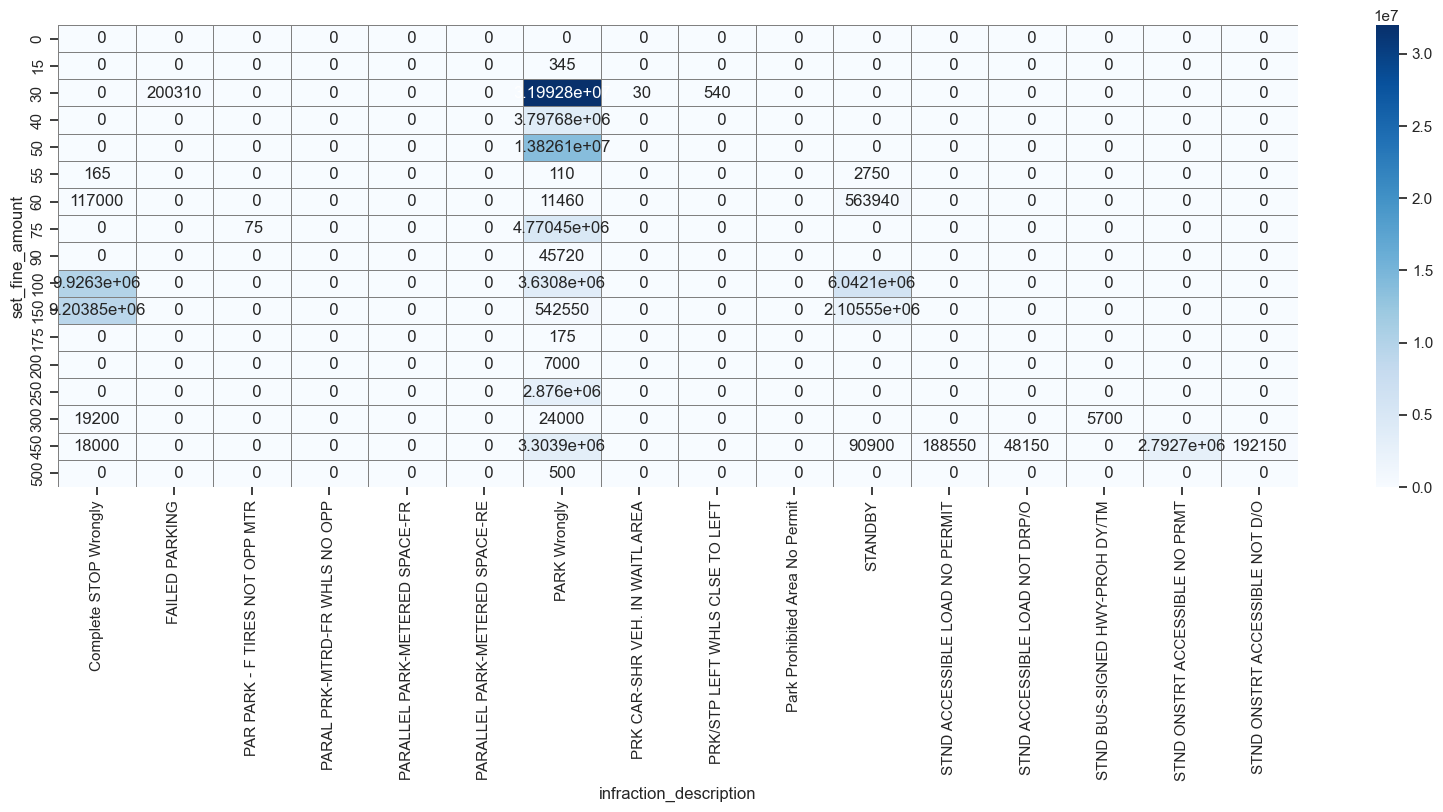

In [346]:
## Reason

## Reason 

Location_group2 = pd.DataFrame(df2.groupby(['set_fine_amount','infraction_description'])['set_fine_amount'].sum())
Location_group2 = Location_group2.unstack(level=0)['set_fine_amount']
Location_group2 = Location_group2.fillna(0)
Location_group2 = Location_group2.T
Location_group2

plt.figure(figsize = (20,6))
sns.set(style="ticks")
plt.xticks(rotation = 90)
plt.grid()
ax = sns.heatmap(Location_group2,cmap="Blues", linewidth = 0.5,linecolor='grey',annot=True,fmt='3g') 

## Now want to see time series.How does the data looks like over the time?

In [347]:
df2 = df

In [348]:
### Time line EDA

df2['date_of_infraction'] = df2['date_of_infraction'].astype("string")
df2['date_of_infraction'] = (df2['date_of_infraction'].str.split("-", expand=True).apply(pd.to_datetime)) 

In [350]:
date_group = df2.groupby(['date_of_infraction'], sort = False).count()
date_group = date_group.drop(['infraction_code','time_of_infraction'], axis=1)
date_group

,tag_number_masked,infraction_description,set_fine_amount,location1,location2,location3,location4,province,country
date_of_infraction,,,,,,,,,
2022-01-01,1768,1768,1768,1712,1768,220,220,1768,1768
2022-01-02,2748,2748,2748,2614,2748,354,354,2748,2748
2022-01-03,1605,1605,1605,1376,1605,151,151,1605,1605
2022-01-04,5060,5060,5060,4350,5060,523,522,5060,5060
2022-01-05,4760,4760,4760,4171,4759,465,466,4760,4760
...,...,...,...,...,...,...,...,...,...
2022-12-27,2212,2212,2212,1909,2212,155,155,2212,2212
2022-12-28,4563,4563,4563,4142,4563,316,316,4563,4563
2022-12-29,4589,4589,4589,4247,4589,390,391,4589,4589


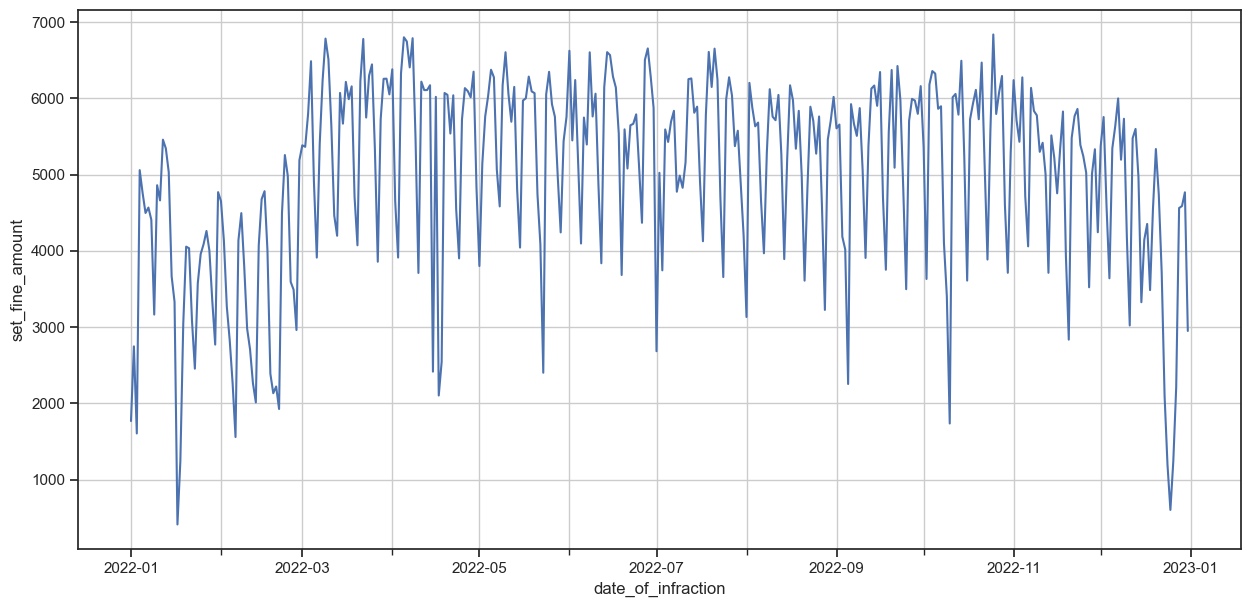

In [351]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%m')



plt.figure(figsize = (15,7))
sns.set(style="ticks")
plt.grid(True)
plt.grid(which='minor')
ax = sns.lineplot(data=date_group["set_fine_amount"]) 

#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)


## The DataFrame consists 365 days of rolling record. lets merge their value to monthly average to see the maximum and minimal Value of the number fine occurred in the whole year

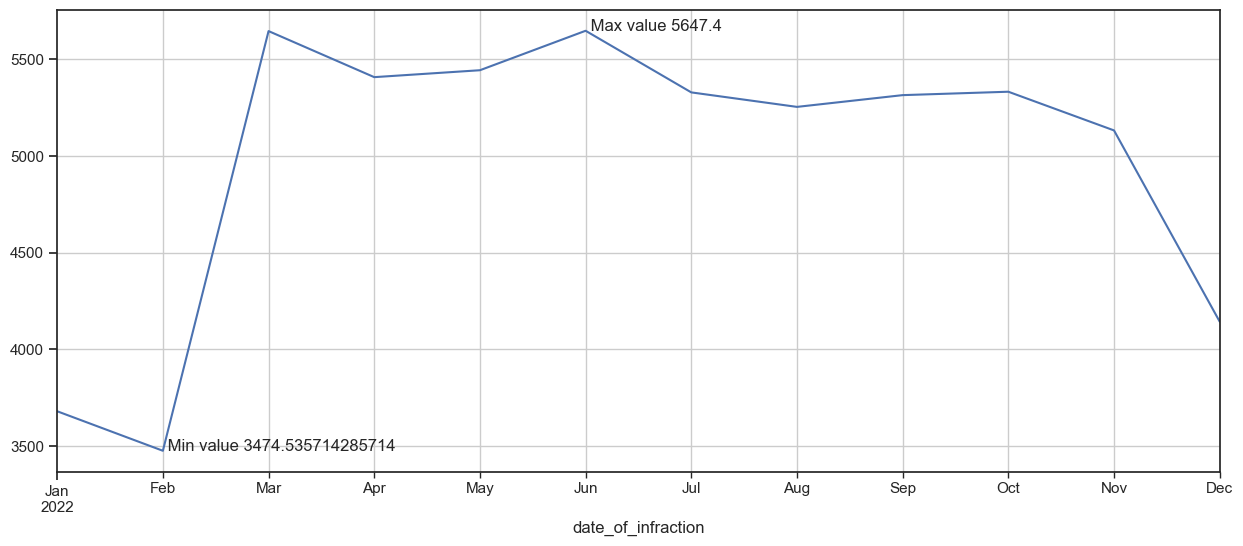

In [352]:
###Decomposition on Resample

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
sns.set(style="ticks")
plt.grid(True)

plt.grid(which='minor')
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

date_group_sampled = date_group['set_fine_amount'].resample('MS').mean()

ax = date_group_sampled.plot(figsize=(15, 6))
date_group_sampled_max = pd.DataFrame(date_group_sampled)
date_group_sampled_max2 = date_group_sampled_max[date_group_sampled_max['set_fine_amount']==date_group_sampled.max()].index[0]
date_group_sampled_min = date_group_sampled_max[date_group_sampled_max['set_fine_amount']==date_group_sampled.min()].index[0]

ax.annotate(' Max value {value}'.format(value=date_group_sampled.max()),(date_group_sampled_max2,date_group_sampled.max()))
ax.annotate(' Min value {value}'.format(value=date_group_sampled.min()),(date_group_sampled_min,date_group_sampled.min()))
ax.yaxis.grid(True)
plt.show()

## Top 3 months of last year( 2022 ) July, Jun, then Aug ( By Ranking )

In [ ]:
### Time Series Analysis

In [353]:
date_crime

infraction_description,Complete STOP Wrongly,FAILED PARKING,PAR PARK - F TIRES NOT OPP MTR,PARAL PRK-MTRD-FR WHLS NO OPP,PARALLEL PARK-METERED SPACE-FR,PARALLEL PARK-METERED SPACE-RE,PARK Wrongly,PRK CAR-SHR VEH. IN WAITL AREA,PRK/STP LEFT WHLS CLSE TO LEFT,Park Prohibited Area No Permit,STANDBY,STND ACCESSIBLE LOAD NO PERMIT,STND ACCESSIBLE LOAD NOT DRP/O,STND BUS-SIGNED HWY-PROH DY/TM,STND ONSTRT ACCESSIBLE NO PRMT,STND ONSTRT ACCESSIBLE NOT D/O
date_of_infraction,,,,,,,,,,,,,,,,
2022-01-01,123.0,4.0,0.0,0.0,0.0,0.0,1583.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,6.0,0.0
2022-01-02,128.0,15.0,0.0,0.0,0.0,0.0,2484.0,0.0,0.0,0.0,113.0,0.0,0.0,0.0,6.0,2.0
2022-01-03,75.0,6.0,0.0,0.0,0.0,0.0,1464.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,4.0,1.0
2022-01-04,327.0,19.0,0.0,0.0,0.0,0.0,4457.0,0.0,0.0,0.0,244.0,2.0,0.0,0.0,11.0,0.0
2022-01-05,309.0,16.0,0.0,0.0,0.0,0.0,4203.0,0.0,0.0,0.0,225.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,126.0,6.0,0.0,0.0,0.0,0.0,1969.0,0.0,0.0,0.0,98.0,1.0,0.0,0.0,11.0,1.0
2022-12-28,488.0,17.0,0.0,0.0,0.0,0.0,3893.0,0.0,0.0,0.0,151.0,0.0,0.0,0.0,14.0,0.0
2022-12-29,566.0,10.0,0.0,0.0,0.0,0.0,3805.0,0.0,0.0,0.0,190.0,1.0,0.0,0.0,15.0,2.0


## Average fine value plot for top 4 occurred different types of reason.

<Figure size 1800x900 with 0 Axes>

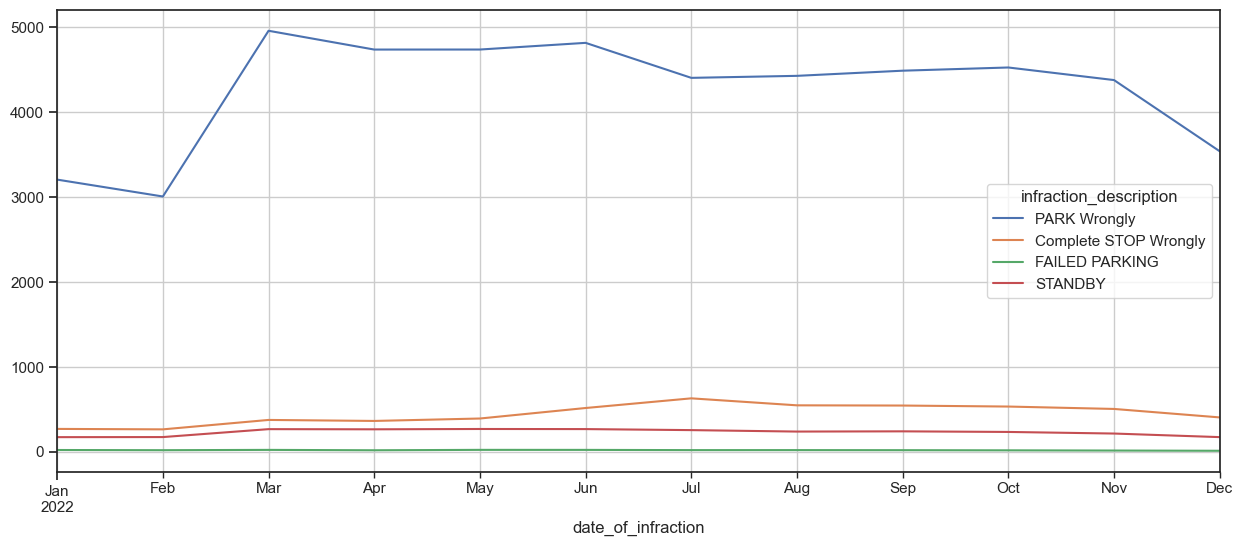

In [354]:
### which time has top 4 occurred fine

#### which date which fine

date_crime = pd.DataFrame(df2.groupby(['date_of_infraction','infraction_description'])['set_fine_amount'].count())
date_crime = date_crime.unstack(level=0)['set_fine_amount']
date_crime = date_crime.fillna(0)
date_crime = date_crime.T
date_crime_sampled = date_crime[['PARK Wrongly','Complete STOP Wrongly','FAILED PARKING','STANDBY']].resample('MS').mean()
date_crime_sampled
plt.figure(figsize = (18,9))
sns.set(style="ticks")
ax = date_crime_sampled.plot(figsize=(15, 6))
ax.yaxis.grid(True)
plt.grid(True)

plt.grid(which='minor')
plt.show()

## Seasonality observation for time Series

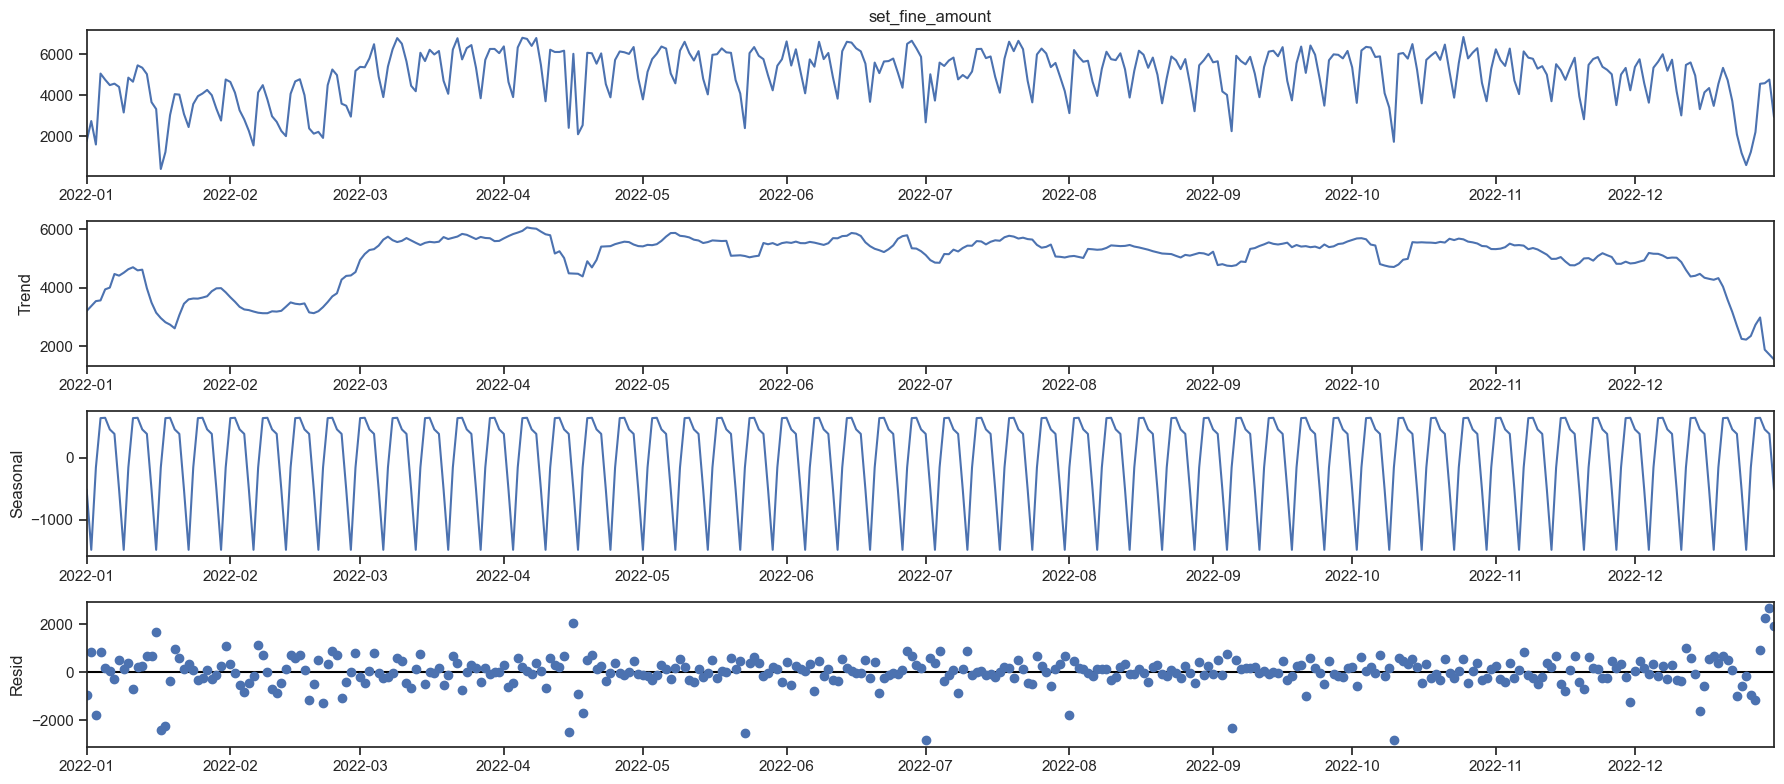

In [355]:
##seasonal decomposition Analysis

from statsmodels.tsa import seasonal

decomposed1 = seasonal.seasonal_decompose(x=date_group['set_fine_amount'], extrapolate_trend='freq',model = 'additive')
fig = decomposed1.plot()
plt.show()

## With the help of moving average( SARIMAX ) we will plot the diagnostic statistics.

[(0, 0, 0, 16), (0, 0, 1, 16), (0, 1, 0, 16), (0, 1, 1, 16), (1, 0, 0, 16), (1, 0, 1, 16), (1, 1, 0, 16), (1, 1, 1, 16)]
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:6203.047178749099
                               SARIMAX Results                                
Dep. Variable:        set_fine_amount   No. Observations:                  365
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3099.524
Date:                Sat, 11 Nov 2023   AIC                           6203.047
Time:                        05:50:32   BIC                           6210.847
Sample:                    01-01-2022   HQIC                          6206.147
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9717      0.014  

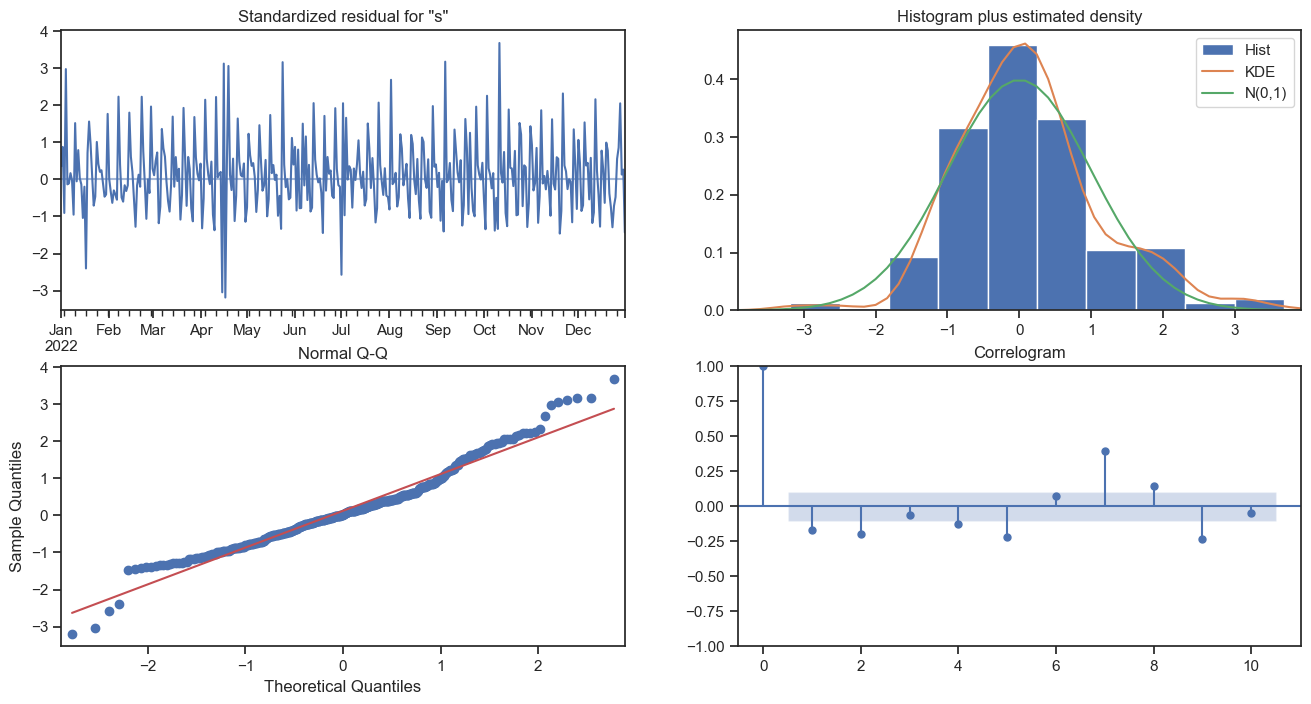

In [356]:
### Time Series Prediction with Arima


#### Time Series prediction with ARIMA 

p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

print(seasonal_pd)

for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(date_group['set_fine_amount'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

### Fitting with the latest Value

mod = sm.tsa.statespace.SARIMAX(date_group['set_fine_amount'])
results = mod.fit()

## print Result summary

print(results.summary())

#### plot_result_diagnostic statistics ##

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [357]:
## Choosing the best parameter 


#### Getting the BEst paramters #### 



for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(date_group['set_fine_amount'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:7277.360783121767
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:6890.360718868088
ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:6890.360718868088
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:6186.744490101048
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:6186.744490101048
ARIMA(0, 1

## For choosing the best parameter above, we got the minimum value of the moving average for order (1,1,1) and seasonal_orer = (0,0,0,16). We will select that index and plot the diagnostic statistics

                               SARIMAX Results                                
Dep. Variable:        set_fine_amount   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3042.106
Date:                Sat, 11 Nov 2023   AIC                           6090.211
Time:                        05:50:52   BIC                           6101.903
Sample:                    01-01-2022   HQIC                          6094.858
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4137      0.047      8.846      0.000       0.322       0.505
ma.L1         -0.9349      0.024    -39.706      0.000      -0.981      -0.889
sigma2      1.056e+06    7.2e+04     14.664      0.0

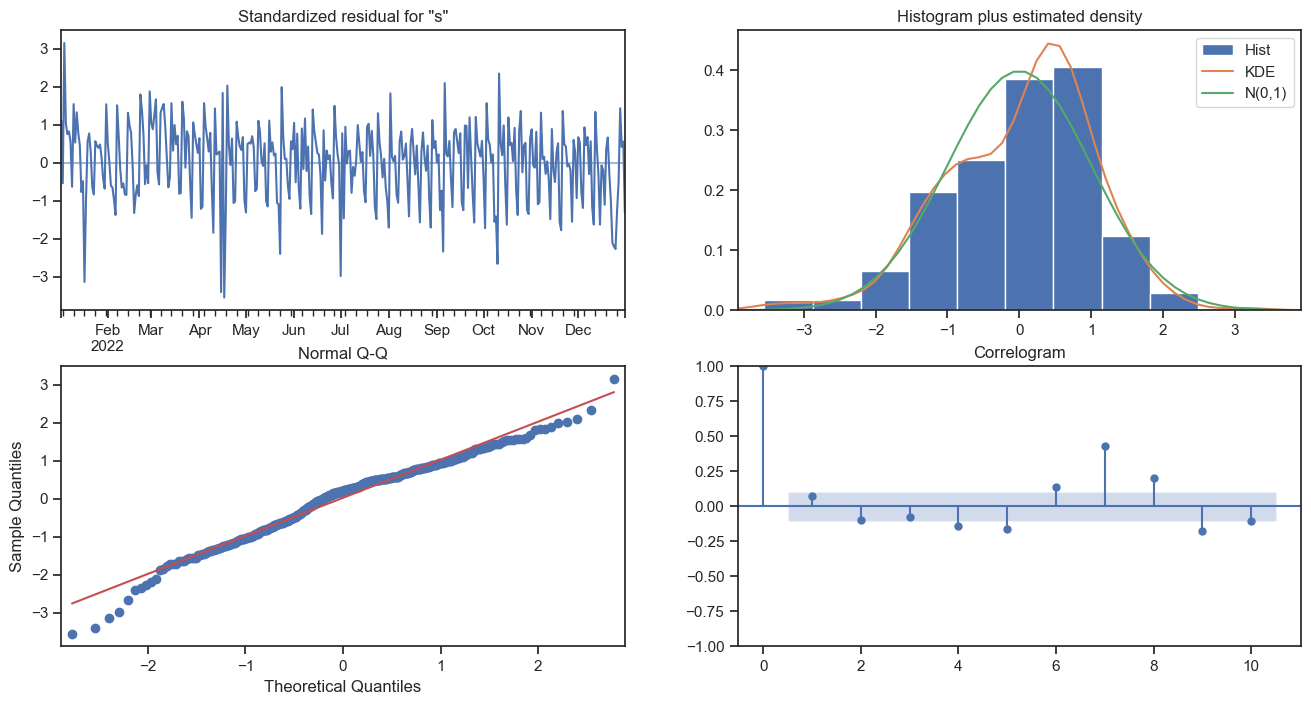

In [358]:
mod = sm.tsa.statespace.SARIMAX(date_group['set_fine_amount'],order=(1, 1, 1),seasonal_order=(0,0,0,16))
results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [359]:
### one step prediction for last 30 days

pred = results.get_prediction(start=date_group.index[334], dynamic=False)
pred_ci = pred.conf_int()

In [360]:
pred_ci.iloc[:,1]

2022-12-01    6702.918888
2022-12-02    7217.017159
2022-12-03    7409.486230
2022-12-04    6875.722649
2022-12-05    6402.449530
2022-12-06    7170.667053
2022-12-07    7321.456972
2022-12-08    7517.630031
2022-12-09    7165.075068
2022-12-10    7425.209086
2022-12-11    6706.024606
2022-12-12    6114.975629
2022-12-13    7221.195370
2022-12-14    7297.328046
2022-12-15    7013.995516
2022-12-16    6227.063742
2022-12-17    6561.087756
2022-12-18    6635.020070
2022-12-19    6202.076793
2022-12-20    6667.773901
2022-12-21    7036.210418
2022-12-22    6770.884637
2022-12-23    6281.921243
2022-12-24    5468.791086
2022-12-25    4948.583107
2022-12-26    4551.477355
2022-12-27    4731.023612
2022-12-28    5100.323849
2022-12-29    6169.109388
2022-12-30    6208.133694
2022-12-31    6320.045310
Freq: D, Name: upper set_fine_amount, dtype: float64

In [361]:
date_group

,tag_number_masked,infraction_description,set_fine_amount,location1,location2,location3,location4,province,country
date_of_infraction,,,,,,,,,
2022-01-01,1768,1768,1768,1712,1768,220,220,1768,1768
2022-01-02,2748,2748,2748,2614,2748,354,354,2748,2748
2022-01-03,1605,1605,1605,1376,1605,151,151,1605,1605
2022-01-04,5060,5060,5060,4350,5060,523,522,5060,5060
2022-01-05,4760,4760,4760,4171,4759,465,466,4760,4760
...,...,...,...,...,...,...,...,...,...
2022-12-27,2212,2212,2212,1909,2212,155,155,2212,2212
2022-12-28,4563,4563,4563,4142,4563,316,316,4563,4563
2022-12-29,4589,4589,4589,4247,4589,390,391,4589,4589


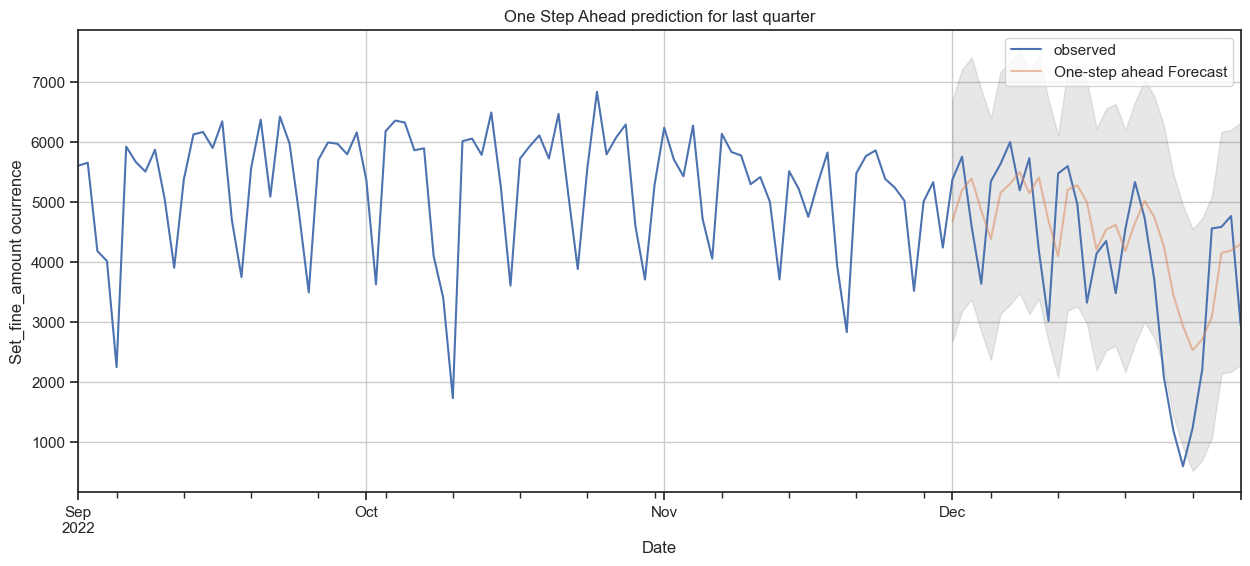

In [362]:
ax = date_group['set_fine_amount']['2022-09-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(15, 6))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.1)
plt.grid(True)

ax.set_xlabel('Date')
ax.set_ylabel('Set_fine_amount ocurrence')
plt.legend()
plt.title('One Step Ahead prediction for last quarter') 
plt.show() 

## One Step Ahead Forecasting for last Quarter

## MAking interactive dashboard with microsoft responsible AI toolbox

In [364]:
#interactive dashboard

df2.head(3)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,country
0,***73863,2022-01-01,29,PARK Wrongly,30,3.0,OPP,233 COLERIDGE AVE,NaN,NaN,ON,CAN
1,***04234,2022-01-01,29,PARK Wrongly,30,801.0,NR,868 MANNING AVE,NaN,NaN,ON,CAN
2,***48080,2022-01-01,29,PARK Wrongly,30,800.0,NR,28 LINDEN ST,NaN,NaN,ON,CAN


In [372]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df4 = df2

df4['infraction_description'] = le.fit_transform(df4['infraction_description'])

df4.head(3)

result = df4.fillna(0)

data_df = result[['time_of_infraction','infraction_code','infraction_description']]
target = df4['set_fine_amount']
target = target.values

X_train, X_test, y_train, y_test = train_test_split(data_df, target, test_size=0.2, random_state=7)
train_data = X_train.copy()
test_data = X_test.copy()
target_feature = 'set_fine_amount'
train_data[target_feature] = y_train
test_data[target_feature] = y_test 

In [373]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [374]:
from raiutils.exceptions import UserConfigValidationException
from raiwidgets import ResponsibleAIDashboard
from responsibleai import RAIInsights

from responsibleai.feature_metadata import FeatureMetadata
feature_metadata = FeatureMetadata(categorical_features=[], dropped_features=[])

rai_insights = RAIInsights(model, train_data, test_data, target_feature, 'regression',
                               feature_metadata=feature_metadata)

# Interpretability
rai_insights.explainer.add()
# Error Analysis
rai_insights.error_analysis.add()
# Counterfactuals: accepts total number of counterfactuals to generate, the range that their label should fall under, 
# and a list of strings of categorical feature names
rai_insights.counterfactual.add(total_CFs=10, desired_range=[50, 120])

### Below cell computation happens for ResponsibleAI Toolbox. It could take more 30 mins for compilation

In [375]:
rai_insights.compute()

Causal Effects
Current Status: Generating Causal Effects.
Current Status: Finished generating causal effects.
Time taken: 0.0 min 3.7099998735357076e-05 sec
Counterfactual
Current Status: Generating 10 counterfactuals for 5000 samples


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [56:41<00:00,  1.47it/s]


Current Status: Generated 10 counterfactuals for 5000 samples.
Time taken: 56.0 min 51.533649799999694 sec
Error Analysis
Current Status: Generating error analysis reports.
Current Status: Finished generating error analysis reports.
Time taken: 0.0 min 0.9179721000000427 sec
Explanations
Current Status: Explaining 3 features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1457509, number of used features: 3
[LightGBM] [Info] Start training from score 52.888608
Current Status: Explained 3 features.
Time taken: 0.0 min 15.983867200000532 sec


In [376]:
ResponsibleAIDashboard(rai_insights)

ResponsibleAI started at http://localhost:5002


## which time top 4 fine has occurred (Average Frequency of occurrence)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


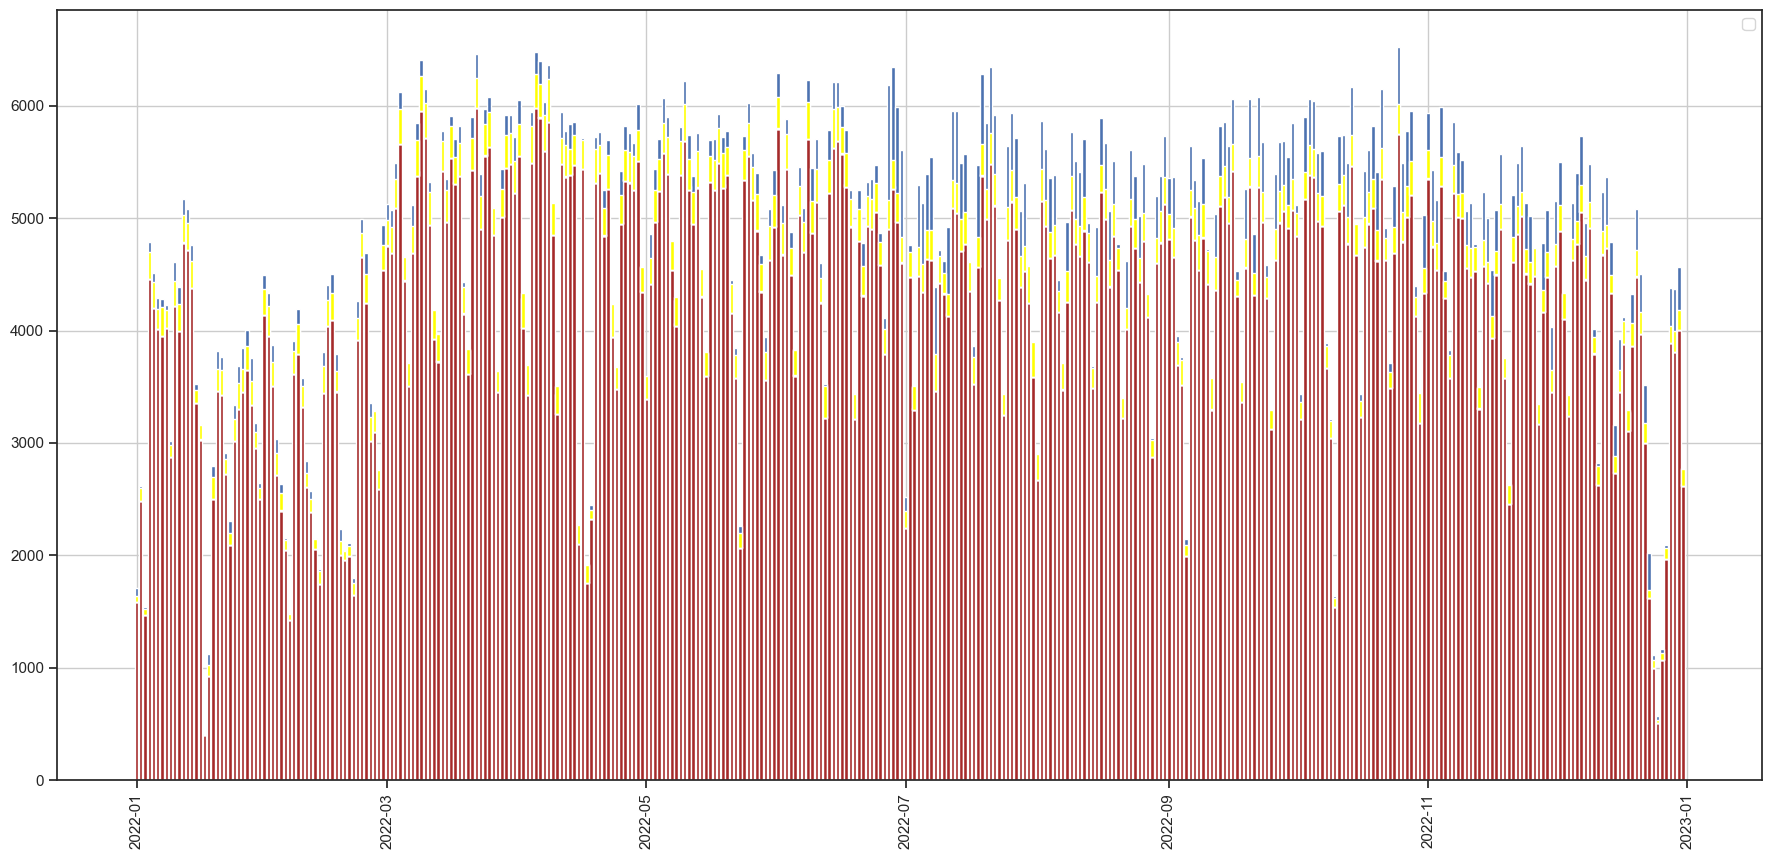

In [331]:
# create data
plt.figure(figsize = (22,10))
sns.set(style="ticks")
plt.xticks(rotation = 90)

plt.grid()

x = date_crime.index
y1 = date_crime['PARK Wrongly']
y2 = date_crime['Complete STOP Wrongly']
y3 = date_crime['FAILED PARKING']
y4 = date_crime['STANDBY']
y5 = date_crime['STND ONSTRT ACCESSIBLE NOT D/O']
 
# plot bars in stack manner
plt.bar(x, y1, color='brown')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom = y1, color = 'green')
plt.bar(x, y4, bottom= y1, color = 'yellow')
plt.bar(x, y5, bottom = y1, color = 'orange') 

plt.legend()
plt.show() 